In [1]:
# !pip install influxdb-client

In [2]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [3]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)
query_api = client.query_api()

{'bucket': 'FinalExperiment', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [4]:
query_standard = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 61)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_standard)

     timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0         30.0       0.0        0.041667            1.0  200.010851  \
1         30.0       1.0        0.041667            1.0  200.010851   
2         30.0       2.0        0.041667            1.0  200.010851   
3         30.0       3.0        0.041667            1.0  200.010851   
4         30.0       4.0        0.000000            0.0  200.000000   
..         ...       ...             ...            ...         ...   
415      630.0      15.0        0.291667            7.0  203.721788   
416      630.0      16.0        0.166667            4.0  200.694444   
417      630.0      17.0        0.250000            6.0  202.343750   
418      630.0      18.0        0.291667            7.0  203.721788   
419      630.0      19.0        0.333333            8.0  205.555556   

      energyUsage  
0    6.000305e+03  
1    1.200054e+04  
2    1.800071e+04  
3    2.400081e+04  
4    3.000090e+04  
..            ...  
415  2.

In [5]:
query_heft = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 62)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)

df_heft = result_heft[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_heft)

     timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0         30.0       0.0        0.041667            1.0  200.010851  \
1         30.0       1.0        0.041667            1.0  200.010851   
2         30.0       2.0        0.041667            1.0  200.010851   
3         30.0       3.0        0.041667            1.0  200.010851   
4         30.0       4.0        0.000000            0.0  200.000000   
..         ...       ...             ...            ...         ...   
415      630.0      15.0        0.166667            4.0  200.694444   
416      630.0      16.0        0.291667            7.0  203.721788   
417      630.0      17.0        0.291667            7.0  203.721788   
418      630.0      18.0        0.291667            7.0  203.721788   
419      630.0      19.0        0.250000            6.0  202.343750   

      energyUsage  
0    6.000305e+03  
1    1.200054e+04  
2    1.800071e+04  
3    2.400081e+04  
4    3.000090e+04  
..            ...  
415  2.

In [6]:
query_random = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 63)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_random)

     timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0         30.0       0.0        0.041667            1.0  200.010851  \
1         30.0       1.0        0.041667            1.0  200.010851   
2         30.0       2.0        0.041667            1.0  200.010851   
3         30.0       3.0        0.041667            1.0  200.010851   
4         30.0       4.0        0.041667            1.0  200.010851   
..         ...       ...             ...            ...         ...   
415      630.0      15.0        0.291667            7.0  203.721788   
416      630.0      16.0        0.250000            6.0  202.343750   
417      630.0      17.0        0.291667            7.0  203.721788   
418      630.0      18.0        0.250000            6.0  202.343750   
419      630.0      19.0        0.250000            6.0  202.343750   

      energyUsage  
0    6.000305e+03  
1    1.200054e+04  
2    1.800071e+04  
3    2.400082e+04  
4    3.000094e+04  
..            ...  
415  2.

In [7]:
# query_minmin = 'from(bucket:"Experiment")\
# |> range(start: 2023-09-18T22:20:00Z, stop: 2023-09-18T22:34:00Z)\
# |> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|host_id/)\
# |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
# |> filter(fn:(r) => r.policy_id == 4)'
# result_minmin = query_api.query_data_frame(org=org, query=query_minmin)
# 
# df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
# print(df_minmin)

In [8]:
df_total_power_standard = df_standard[['timestamp','serverId','energyUsage']]
df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['serverId'] == 19]
print(df_total_power_standard)

     timestamp  serverId   energyUsage
19        30.0        19  1.200013e+05
39        60.0        19  2.411893e+05
59        90.0        19  3.709359e+05
79       120.0        19  4.930275e+05
99       150.0        19  6.233264e+05
119      180.0        19  7.455687e+05
139      210.0        19  8.759823e+05
159      240.0        19  9.979737e+05
179      270.0        19  1.128579e+06
199      300.0        19  1.250769e+06
219      330.0        19  1.381222e+06
239      360.0        19  1.503133e+06
259      390.0        19  1.633082e+06
279      420.0        19  1.755223e+06
299      450.0        19  1.885663e+06
319      480.0        19  2.007486e+06
339      510.0        19  2.137462e+06
359      540.0        19  2.259562e+06
379      570.0        19  2.390145e+06
399      600.0        19  2.512060e+06
419      630.0        19  2.642670e+06


/tmp/ipykernel_45671/658179243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)


In [9]:
df_total_power_heft = df_heft[['timestamp','serverId','energyUsage']]
df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['serverId'] == 19]
print(df_total_power_heft)

     timestamp  serverId   energyUsage
19        30.0        19  1.200013e+05
39        60.0        19  2.411893e+05
59        90.0        19  3.709372e+05
79       120.0        19  4.930297e+05
99       150.0        19  6.233277e+05
119      180.0        19  7.455694e+05
139      210.0        19  8.759839e+05
159      240.0        19  9.979675e+05
179      270.0        19  1.128571e+06
199      300.0        19  1.250760e+06
219      330.0        19  1.381211e+06
239      360.0        19  1.503119e+06
259      390.0        19  1.633081e+06
279      420.0        19  1.755221e+06
299      450.0        19  1.885670e+06
319      480.0        19  2.007495e+06
339      510.0        19  2.137456e+06
359      540.0        19  2.259559e+06
379      570.0        19  2.390128e+06
399      600.0        19  2.512037e+06
419      630.0        19  2.642644e+06


/tmp/ipykernel_45671/2174346701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)


In [10]:
df_total_power_random = df_random[['timestamp','serverId','energyUsage']]
df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['serverId'] == 19]
print(df_total_power_random)

     timestamp  serverId   energyUsage
19        30.0        19  1.200013e+05
39        60.0        19  2.411872e+05
59        90.0        19  3.709390e+05
79       120.0        19  4.930364e+05
99       150.0        19  6.233218e+05
119      180.0        19  7.455621e+05
139      210.0        19  8.759830e+05
159      240.0        19  9.979727e+05
179      270.0        19  1.128582e+06
199      300.0        19  1.250766e+06
219      330.0        19  1.381198e+06
239      360.0        19  1.503102e+06
259      390.0        19  1.633066e+06
279      420.0        19  1.755210e+06
299      450.0        19  1.885662e+06
319      480.0        19  2.007488e+06
339      510.0        19  2.137453e+06
359      540.0        19  2.259555e+06
379      570.0        19  2.390129e+06
399      600.0        19  2.512037e+06
419      630.0        19  2.642646e+06


/tmp/ipykernel_45671/1030175566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)


In [11]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','energyUsage']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

/tmp/ipykernel_45671/607993114.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


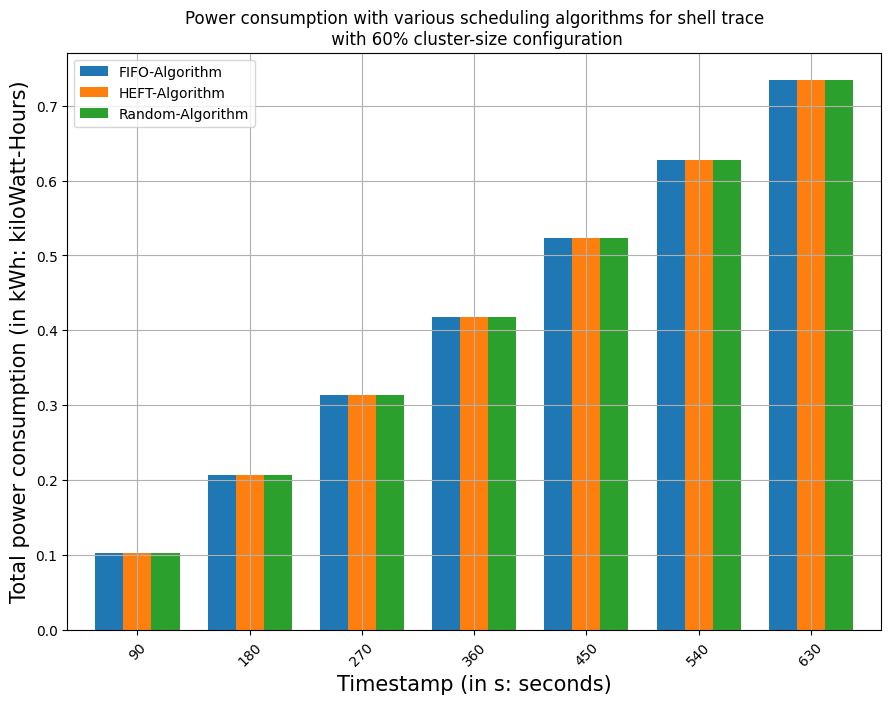

In [12]:
df1 = df_total_power_standard.drop(['serverId'], axis=1)
df2 = df_total_power_heft.drop(['serverId'], axis=1)
df3 = df_total_power_random.drop(['serverId'], axis=1)
# df4 = df_total_power_minmin.drop(['host_id'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
# df_merged["energyUsage_w"] = df_merged["energyUsage_w"]/1000000
df_merged.rename(columns={'energyUsage': 'FIFO-Algorithm', 'energyUsage_y': 'HEFT-Algorithm', 'energyUsage_z': 'Random-Algorithm'}, inplace=True) #, 'energyUsage_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)

# drop first and second column to have consistent distance of plots
df_merged = df_merged.drop(0)
# df_merged = df_merged.reset_index(drop= True)
df_merged = df_merged.drop(1)
df_merged = df_merged.reset_index(drop= True)
# Create a custom x-axis with every 3rd value, due to very large number of elements in timestamp!
df_merged = df_merged[df_merged.index % 3 == 0]

# print(df_merged)
# Create a bar plot of the merged dataframe, grouped by timestamp
fig, ax = plt.subplots()
df_merged.plot.bar(x='timestamp', ax=ax, title='Power consumption with various scheduling algorithms for shell trace\n with 60% cluster-size configuration', width=.75)
plt.gca().xaxis.set_tick_params(rotation=45)
plt.grid(True)
plt.ylabel('Total power consumption (in kWh: kiloWatt-Hours)', fontsize=15)
plt.xlabel('Timestamp (in s: seconds)', fontsize=15)
fig.set_size_inches(10.5, 7.5)
fig.savefig('multiple_hosts_energy_plotted_trace_shell_60.png', bbox_inches='tight')
fig.show()

In [13]:
# df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
# df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
# df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
print(df_merged)

    timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm
0          90        0.103038        0.103038          0.103039
3         180        0.207102        0.207103          0.207101
6         270        0.313494        0.313492          0.313495
9         360        0.417537        0.417533          0.417528
12        450        0.523795        0.523797          0.523795
15        540        0.627656        0.627655          0.627654
18        630        0.734075        0.734068          0.734068


In [14]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['FIFO-Algorithm'] != 0]['FIFO-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard} kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft} kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random} kWh")

Total energy consumption in FIFO algorithm for executing given trace - 0.7340749187948493 kWh
Total energy consumption in HEFT algorithm for executing given trace - 0.7340676861089402 kWh
Total energy consumption in Random algorithm for executing given trace - 0.734068268628761 kWh


In [15]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[0.7340749187948493, 0.7340676861089402, 0.734068268628761]


In [16]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.5f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for shell workload trace and 60% cluster-size configuration.")


Resource scheduling algorithm HEFT is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm FIFO records 0.00099% worse energy-efficiency than the scheduling algorithm HEFT for shell workload trace and 60% cluster-size configuration.
Scheduling algorithm Random records 0.00008% worse energy-efficiency than the scheduling algorithm HEFT for shell workload trace and 60% cluster-size configuration.
